<a href="https://colab.research.google.com/github/astaraniwili/myproject/blob/master/Project_Machine_Learning_DTS_Astarani_Wili_Martha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Project </center>

### Klasifikasi Data Survivabilitas Korban Kapal RMS Titanic
Data ini berisi tentang informasi penumpang kapal RMS Titanic. Dengan dilakukannya klasifikasi, untuk mengetahui penumpang seperti apa yang memiliki kemungkinan bertahan hidup. Dari project ini, dilakukakan metode klasifikasi Regresi Logistik Biner dan SVM.

In [ ]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import pylab as pl
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

## Visualisasi Data

In [ ]:
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029759BA1BE0>]],
      dtype=object)

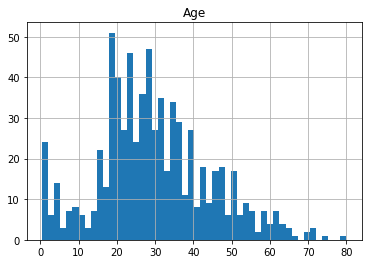

In [ ]:
data.hist(column='Age', bins=50)

Dari hasil histogram diketahui penumpang kapal titanic lebih banyak berusia sekitar antara 10 tahun keatas sampai 30 tahun

C:\Users\Astarani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Astarani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


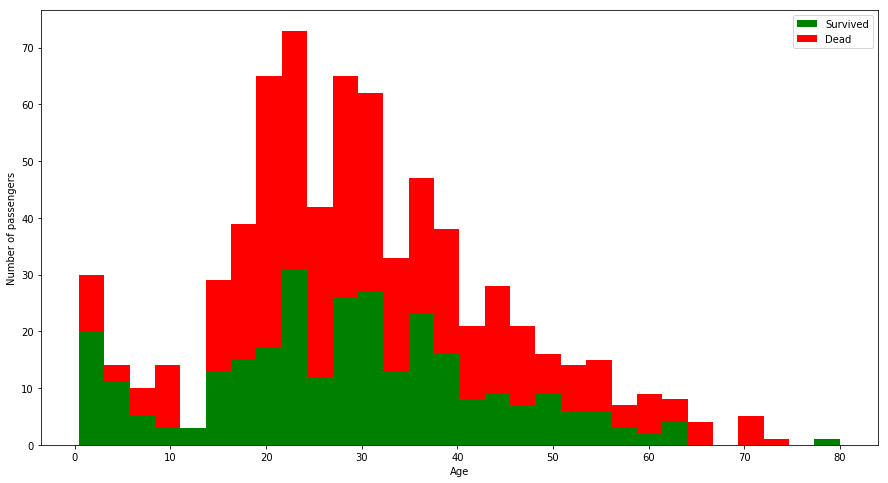

In [ ]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

Hasil visualisasi data dengan histogram, dapat diketahui lebih banyak penumpang kapal titanic yang meninggal yang berusia antara 20 tahun sampai 30 tahun keatas

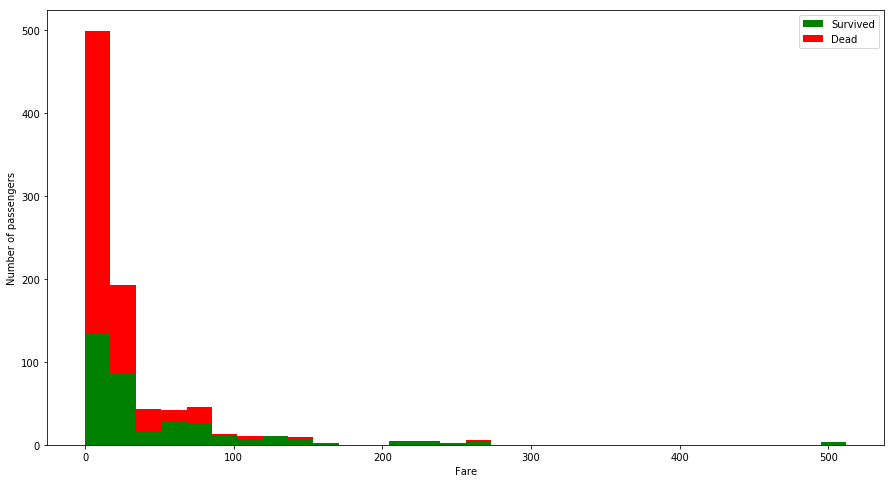

In [ ]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Jumlah penumpang dengan biaya perjalanan kapal RMS Titanic mulai dari 0 sampai 100 British Pounds setara, baik penumpang yang terselamatkan maupun meninggal. Akan tetapi lebih banyak penumpang yang meninggal, daripada penumpang dengan biaya perjalanan lebih dari 100 British Pounds

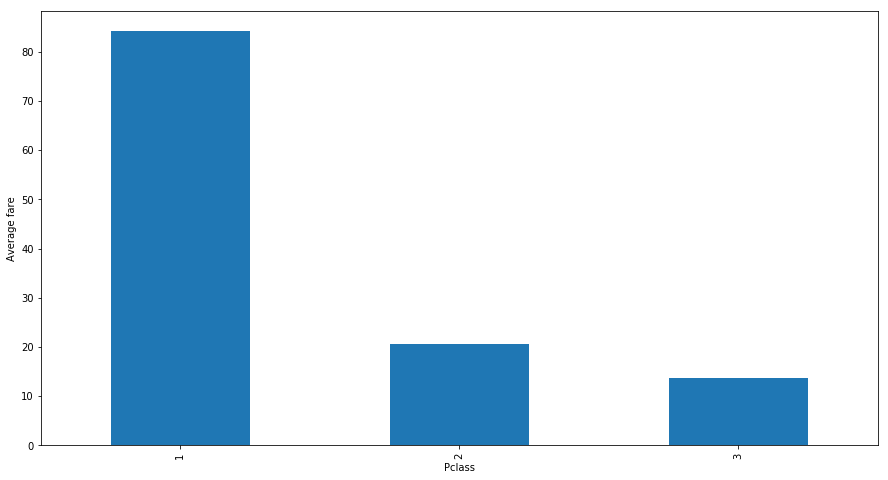

In [ ]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

Dari rata-rata biaya perjalanan dari penumpang kapal RMS Titanic, lebih banyak pengguna Passenger Class 1st atau kelas Upper daripada pengguna class 2nd (Middle) dan 3rd (Lower) 

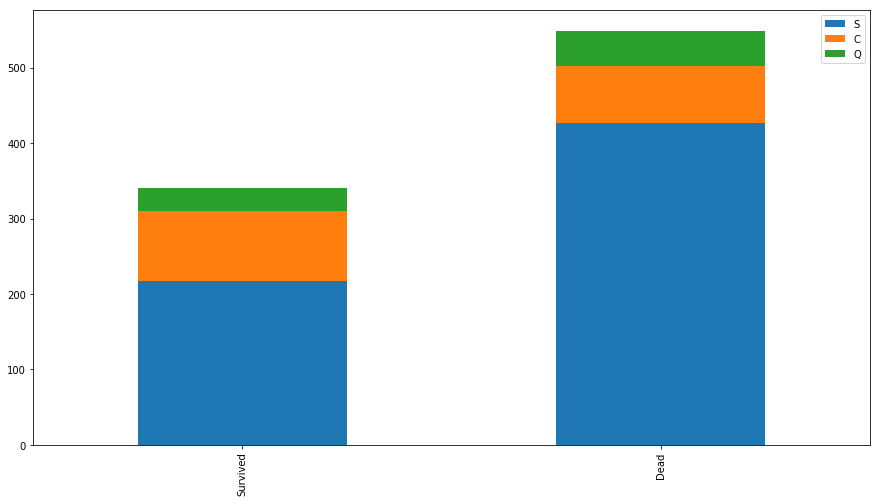

In [ ]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
data1= pd.DataFrame([survived_embark,dead_embark])
data1.index = ['Survived','Dead']
data1.plot(kind='bar', stacked=True, figsize=(15,8))

Hasil dari jumlah penumpang yang meninggal maupun terselamatkan sama, dan tidak dipengruhi oleh tujuan Pelabuhan (Cherbourg, Queenstown, dan Southampton)

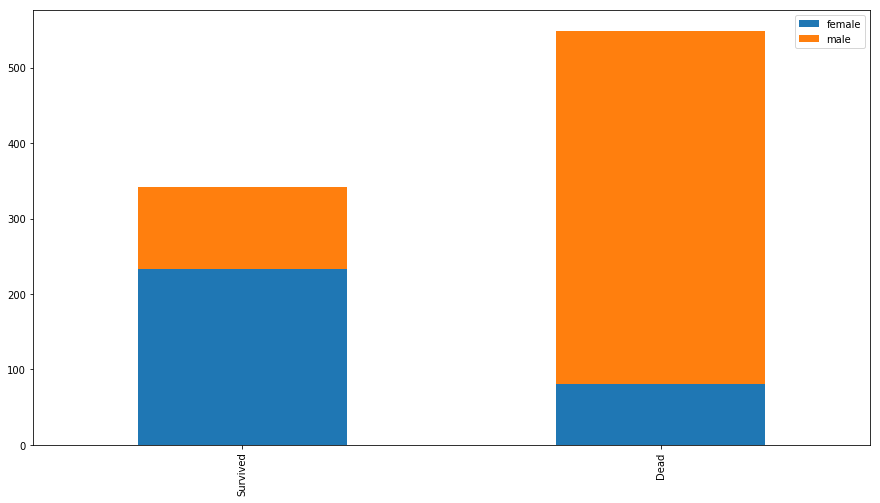

In [ ]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

Lebih banyak penumpang yang meninggal adalah penumpang Laki-laki. Sedangkan penumpang yang diselamatkan adalah penumpang wanita.

## Statistika Deskriptif

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Mengatasi Missing Value

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cleaning Data

In [ ]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [ ]:
Embarked_map={'Embarked':{'S':1,'C':2,'Q':3}}

In [ ]:
labels1 = data['Embarked'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'Embarked' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}

print(replace_map_comp1)

{'Embarked': {'C': 1, 'Q': 2, 'S': 3}}


In [ ]:
data_replace1 = data.copy()

In [ ]:
data_replace1.replace(replace_map_comp1, inplace=True)
print(data_replace1.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    male  22.0      1      0   7.2500       3.0
1         1       1  female  38.0      1      0  71.2833       1.0
2         1       3  female  26.0      0      0   7.9250       3.0
3         1       1  female  35.0      1      0  53.1000       3.0
4         0       3    male  35.0      0      0   8.0500       3.0


In [ ]:
Sex_map={'Sex':{'Male':1,'Female':2}}

In [ ]:
labels2 = data['Sex'].astype('category').cat.categories.tolist()
replace_map_comp2 = {'Sex' : {k: v for k,v in zip(labels2,list(range(1,len(labels2)+1)))}}
print(replace_map_comp2)

{'Sex': {'female': 1, 'male': 2}}


In [ ]:
data_replace2 = data_replace1.copy()

In [ ]:
data_replace2.replace(replace_map_comp2, inplace=True)
print(data_replace2.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    2  22.0      1      0   7.2500       3.0
1         1       1    1  38.0      1      0  71.2833       1.0
2         1       3    1  26.0      0      0   7.9250       3.0
3         1       1    1  35.0      1      0  53.1000       3.0
4         0       3    2  35.0      0      0   8.0500       3.0


In [ ]:
data_replace2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df1=data_replace2.dropna(axis='rows')

In [ ]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data1=pd.DataFrame(df1)
data1.to_csv("data cleaning titanic.csv")

## Logistic Regression

In [ ]:
data=pd.read_csv("data cleaning titanic.csv")
data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,2,22.0,1,0,7.2500,3.0
1,1,1,1,1,38.0,1,0,71.2833,1.0
2,2,1,3,1,26.0,0,0,7.9250,3.0
3,3,1,1,1,35.0,1,0,53.1000,3.0
4,4,0,3,2,35.0,0,0,8.0500,3.0


In [ ]:
X = np.asarray(data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])
X[0:5]

array([[ 3.    ,  2.    , 22.    ,  1.    ,  0.    ,  7.25  ,  3.    ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ,  3.    ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,  3.    ],
       [ 3.    ,  2.    , 35.    ,  0.    ,  0.    ,  8.05  ,  3.    ]])

In [ ]:
y = np.asarray(data['Survived'])
y [0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.82520863,  0.73534203, -0.56367407,  0.43135024, -0.47432585,
        -0.50023975,  0.58683958],
       [-1.57221121, -1.35991138,  0.66921696,  0.43135024, -0.47432585,
         0.78894661, -1.93955453],
       [ 0.82520863, -1.35991138, -0.25545131, -0.47519908, -0.47432585,
        -0.48664993,  0.58683958],
       [-1.57221121, -1.35991138,  0.43804989,  0.43135024, -0.47432585,
         0.42286111,  0.58683958],
       [ 0.82520863,  0.73534203,  0.43804989, -0.47519908, -0.47432585,
        -0.4841333 ,  0.58683958]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (711, 7) (711,)
Test set: (178, 7) (178,)


In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.33889201, 0.66110799],
       [0.14856809, 0.85143191],
       [0.62225427, 0.37774573],
       [0.32019498, 0.67980502],
       [0.26363476, 0.73636524],
       [0.55673383, 0.44326617],
       [0.7620822 , 0.2379178 ],
       [0.38201289, 0.61798711],
       [0.77943143, 0.22056857],
       [0.84403126, 0.15596874],
       [0.76563623, 0.23436377],
       [0.15493622, 0.84506378],
       [0.73234291, 0.26765709],
       [0.76669383, 0.23330617],
       [0.44699015, 0.55300985],
       [0.41097019, 0.58902981],
       [0.77858442, 0.22141558],
       [0.77924923, 0.22075077],
       [0.16297193, 0.83702807],
       [0.79053933, 0.20946067],
       [0.67823461, 0.32176539],
       [0.81115081, 0.18884919],
       [0.30833698, 0.69166302],
       [0.72986065, 0.27013935],
       [0.78760213, 0.21239787],
       [0.77993265, 0.22006735],
       [0.48279509, 0.51720491],
       [0.42746436, 0.57253564],
       [0.41015316, 0.58984684],
       [0.78742192, 0.21257808],
       [0.

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7528089887640449

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[50 23]
 [21 84]]


Confusion matrix, without normalization
[[50 23]
 [21 84]]


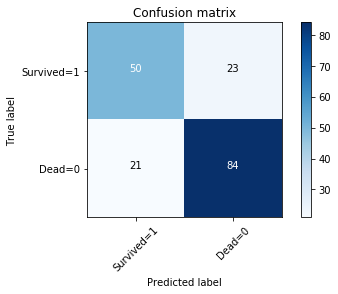

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Dead=0'],normalize= False,  title='Confusion matrix')

Terdapat 178 sampel testing dataset, klasifier memprediksi penumpang yang terselamatkan sebanyak 73 penumpang, dan prediksi tidak terselamatkan adalah sebanyak 105 penumpang. Sedangkan pada data aktual terdapat 71 penumpang yang terselamtkan, namun 107 penumpang lainnya tidak terselamatkan. Hasil prediksi 23 penumpang merupakan __False Positif (FP)__ dimana nilai prediksi menyatakan hasil penumpang yang terselamatkan sedangkan data aktualnya tidak terselamatkan. Hasil prediksi bernilaii 21 merupakan __False Negatif (FN)__ dimana nilai prediksi menyatakan hasil penumpang yang tidak terselamatkan tetapi data aktualnya terselamatkan. Kemudian penumpang tidak terselamatkan sebanyak 84 penumpang.

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       105
           1       0.70      0.68      0.69        73

   micro avg       0.75      0.75      0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



Dapat diketahui akurasi rata-rata untuk klasifikasi ini adalah dari rata-rata __F1-score__ untuk kedua label tersebut adalah 0,75 dalam data ini.

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5175421194774706

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train,y_train)
print("our accuracy is: {}".format(lr.score(X_test,y_test)))

our accuracy is: 0.7808988764044944


C:\Users\Astarani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## SVM

In [ ]:
data=pd.read_csv("data cleaning titanic.csv")
data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,2,22.0,1,0,7.2500,3.0
1,1,1,1,1,38.0,1,0,71.2833,1.0
2,2,1,3,1,26.0,0,0,7.9250,3.0
3,3,1,1,1,35.0,1,0,53.1000,3.0
4,4,0,3,2,35.0,0,0,8.0500,3.0


In [ ]:
data.dtypes

Unnamed: 0      int64
Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked      float64
dtype: object

In [ ]:
data['Age'] = data['Age'].astype('int')
data['Fare'] = data['Fare'].astype('int')
data['Embarked'] = data['Embarked'].astype('int')
data.dtypes

Unnamed: 0    int64
Survived      int64
Pclass        int64
Sex           int64
Age           int32
SibSp         int64
Parch         int64
Fare          int32
Embarked      int32
dtype: object

In [ ]:
X = np.asarray(data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])
X[0:5]

array([[ 3,  2, 22,  1,  0,  7,  3],
       [ 1,  1, 38,  1,  0, 71,  1],
       [ 3,  1, 26,  0,  0,  7,  3],
       [ 1,  1, 35,  1,  0, 53,  3],
       [ 3,  2, 35,  0,  0,  8,  3]], dtype=int64)

In [ ]:
y = np.asarray(data['Survived'])
y [0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (711, 7) (711,)
Test set: (178, 7) (178,)


In [ ]:
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       105
           1       0.67      0.53      0.60        73

   micro avg       0.70      0.70      0.70       178
   macro avg       0.69      0.68      0.68       178
weighted avg       0.70      0.70      0.70       178

Confusion matrix, without normalization
[[39 34]
 [19 86]]


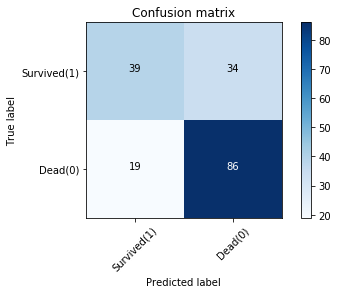

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived(1)','Dead(0)'],normalize= False,  title='Confusion matrix')

Terdapat 178 sampel testing dataset, klasifier memprediksi penumpang yang terselamatkan sebanyak 73 penumpang, dan prediksi tidak terselamatkan adalah sebanyak 105 penumpang. Sedangkan pada data aktual terdapat 58 penumpang yang terselamtkan, namun 120 penumpang lainnya tidak terselamatkan. Hasil prediksi 34 penumpang merupakan __False Positif (FP)__ dimana nilai prediksi menyatakan hasil penumpang yang terselamatkan sedangkan data aktualnya tidak terselamatkan. Hasil prediksi bernilaii 19 merupakan __False Negatif (FN)__ dimana nilai prediksi menyatakan hasil penumpang yang tidak terselamatkan tetapi data aktualnya terselamatkan. Kemudian penumpang tidak terselamatkan sebanyak 86 penumpang.

Dapat diketahui akurasi rata-rata untuk klasifikasi ini adalah dari rata-rata __F1-score__ untuk kedua label tersebut adalah 0,70 dalam data ini.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6951253680990366

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.702247191011236